In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.python.keras import layers
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('./Input/data/final_cred_data.csv', index_col=0)
data.head()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,152212.222222,1.816,13.245219,NaN,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0
1,159074.444444,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,NaN,0.062966,0.130546,-0.303582,NaN,NaN,0
2,43127.777778,24.000,-9.067399,0.762501,NaN,0.052481,-0.101681,-88.000000,0.117912,NaN,0.358812,-0.367016,NaN,361.000000,0
3,156042.222222,8.000,8.728304,-0.382673,NaN,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,NaN,-1.654373,0
4,154720.000000,59.496,7.657141,0.150611,NaN,-0.034883,0.826100,0.357556,0.147640,NaN,0.080491,-0.693792,-0.308631,0.563570,0


In [56]:
data.shape

(140000, 15)

In [57]:
data['Timestamp'].describe()

count    140000.000000
mean     105334.592698
std       52763.641695
min           0.000000
25%       60107.500000
50%       94276.111111
75%      154845.833333
max      191985.555556
Name: Timestamp, dtype: float64

1. The range between the min and max values is failry large compared to the std,
which suggests that there may be some outliers or a non-normal distribution

2. The quartiles are not evenly spaced, which is another indication that the distribution may not be normal

3. The mean is closely to the median, which suggests that the distribution maybe some what symmetrical

<Axes: ylabel='Density'>

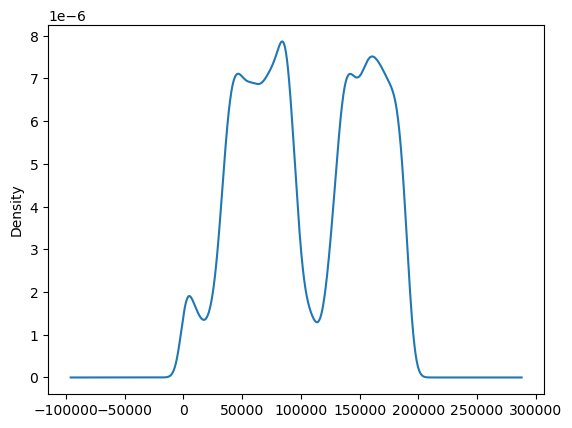

In [58]:
data['Timestamp'].plot.kde()


In [59]:
data['Class'].value_counts()

0    139747
1       253
Name: Class, dtype: int64

this suggests that the class data is highly skewed and that theres is a class imbalance,

In [60]:
data.isna().sum()

Timestamp        0
Value            0
C1           23768
C2           10269
C3           10307
C4               0
C5           10322
C6           23471
C7           14405
C8           10355
C9               0
C10          10109
C11          14305
C12          14167
Class            0
dtype: int64

In [61]:
data[['C1']].describe()

,C1
count,116232.000000
mean,-13.647954
std,224.599903
min,-2000.000000
25%,-6.419730
50%,-1.250014
75%,5.063801
max,2000.000000


In [62]:
data[['C2']].describe()

,C2
count,129731.000000
mean,-15.797094
std,72.631165
min,-500.000000
25%,-0.262951
50%,-0.019520
75%,0.220734
max,100.000000


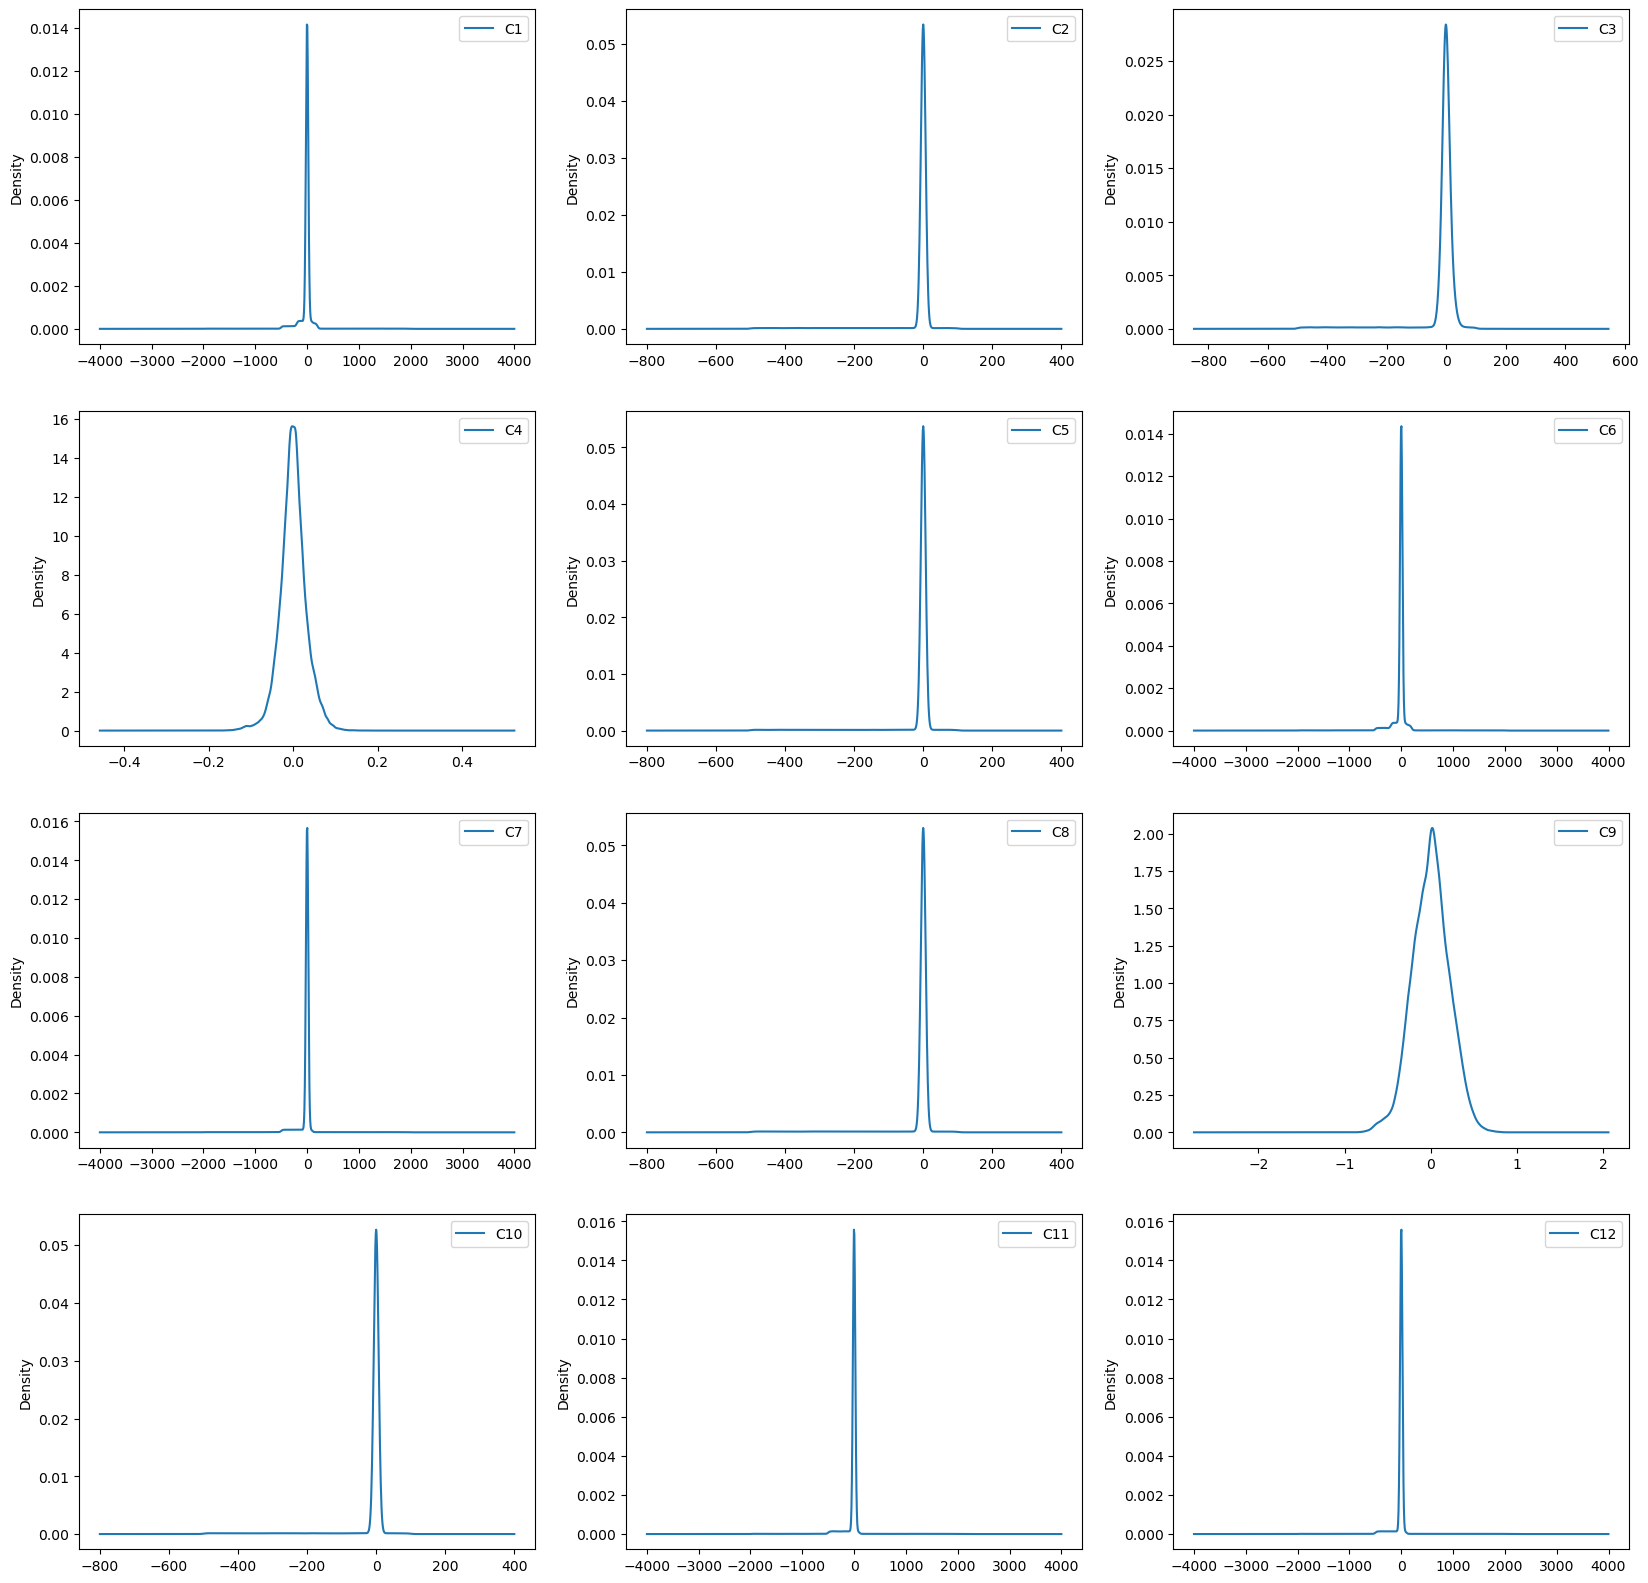

In [63]:
c_col_names = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12']

fig, idx = plt.subplots(4, 3, figsize=(20, 20))
idx = idx.flatten()

for i, col in enumerate(c_col_names):
    data[[col]].plot.kde(ax=idx[i])

the visualization shows that the data for the C columns is normaly distributed

#### Dropping the Timestamp column because it useful

In [64]:
data.drop(columns=['Timestamp'], inplace=True)

#### filling missing values by mean imputation

In [65]:
data = data.fillna(data.mean())

#### Normalizing data

Makes sense to normalize data, since the min / max of the different columns differ

In [67]:
normalized_data = (data - data.min()) / (data.max() - data.min())
normalized_data.head()

,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,0.000088,0.503311,0.807005,0.741480,0.492391,0.835464,0.500812,0.499792,0.833443,0.599226,0.833271,0.437219,0.500006,0.0
1,0.007958,0.501100,0.833474,0.268523,0.436531,0.833160,0.500404,0.496432,0.833438,0.697043,0.832827,0.495873,0.496251,0.0
2,0.001168,0.497733,0.834604,0.694799,0.539528,0.833164,0.478120,0.500155,0.806555,0.792032,0.832722,0.495873,0.590398,0.0
3,0.000389,0.502182,0.832696,0.694799,0.196422,0.833129,0.489122,0.415562,0.833404,0.534002,0.833160,0.495873,0.499711,0.0
4,0.002895,0.501914,0.833584,0.694799,0.361673,0.834710,0.500214,0.500162,0.806555,0.676214,0.832177,0.499673,0.500266,0.0


In [69]:
X_train = data.drop('Class', axis=1).values
y_train = data['Class'].values

In [70]:
print(X_train.shape, y_train.shape)

(140000, 13) (140000,)
